In [1]:
import pickle

# Import raw data. Format is list of dicts, each with
# 'label' and 'data' keys.

# sit_walk data
with open("sit_walk.pkl",'rb') as f:
    sit_walk_data = pickle.load(f)
    
# run data
with open("run.pkl",'rb') as f:
    run_data = pickle.load(f)

# sit data
with open("sit1.pkl",'rb') as f:
    sit_data = pickle.load(f)

# slip data
with open("slip.pkl",'rb') as f:
    slip_data = pickle.load(f)
    
#for sample in sit_data:
    #print(len(sample['data']))

In [2]:
from random import shuffle

# CLEAN UP DATA
# define sample length - that is, how many measurements the samples that
# are passed to the SVM will include. Based on smallest sample in slip_data.
sample_length = 1000; #aribtary high number for min comparison
for sample in slip_data:
    if len(sample['data']) < sample_length:
        sample_length = len(sample['data'])
print('sample length:', sample_length)

# new data containers
slip_data_fixed_length = []
sit_walk_data_fixed_length = []
run_data_fixed_length = []
sit_data_fixed_length = []

# Extract maximum number of data samples from raw data, and shuffle.
for experiment in slip_data:
    experiment['label'] = 'slip'
    for i in range(len(experiment['data']) - sample_length):
        temp = {}
        temp['label'] = 'slip'
        temp['data'] = experiment['data'][i:i+sample_length]
        slip_data_fixed_length.append(temp)
shuffle(slip_data_fixed_length)

for experiment in sit_data:
    experiment['label'] = 'sit'
    for i in range(len(experiment['data']) - sample_length):
        temp = {}
        temp['label'] = 'sit'
        temp['data'] = experiment['data'][i:i+sample_length]
        sit_data_fixed_length.append(temp)
shuffle(sit_data_fixed_length)
        
for experiment in run_data:
    experiment['label'] = 'run'
    for i in range(len(experiment['data']) - sample_length):
        temp = {}
        temp['label'] = 'run'
        temp['data'] = experiment['data'][i:i+sample_length]
        run_data_fixed_length.append(temp)
shuffle(run_data_fixed_length)

for experiment in sit_walk_data:
    experiment['label'] = 'sit_walk'
    for i in range(len(experiment['data']) - sample_length):
        temp = {}
        temp['label'] = 'sit_walk'
        temp['data'] = experiment['data'][i:i+sample_length]
        sit_walk_data_fixed_length.append(temp)
shuffle(sit_walk_data_fixed_length)

sample length: 9


/Users/user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


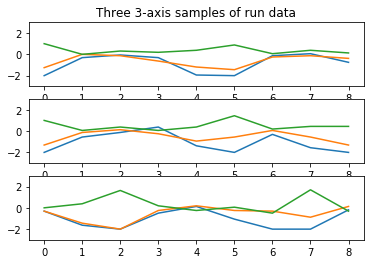

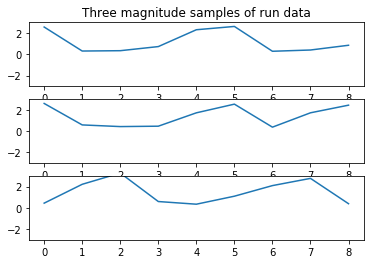

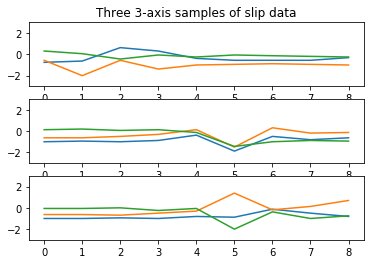

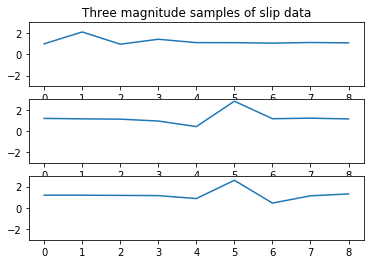

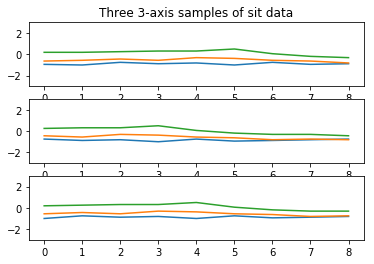

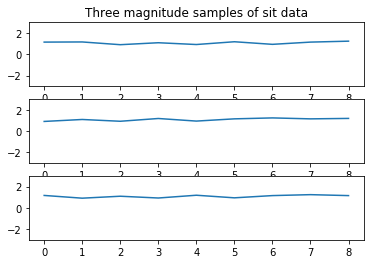

In [15]:
import matplotlib.pyplot as plt
import numpy as np


# PLOT SOME DATA

# FUNCTIONS

# plot 3 samples of 3-axis data
def plot_xyz(samples):
    for i in range(3):
        x_vals = []
        y_vals = []
        z_vals = []
        for x,y,z in samples[i]['data']:
            x_vals.append(x)
            y_vals.append(y)
            z_vals.append(z)
        plt.subplot(3,1,i+1)
        plt.plot(x_vals)
        plt.plot(y_vals)
        plt.plot(z_vals)
        plt.ylim(-3, 3)
    # return to top subplot to add title
    plt.subplot(3,1,1)
    plt.title('Three 3-axis samples of {} data'.format(samples[0]['label']))
    plt.show()
    
# PLOT SOME DATA
# plot 2 samples of magnitude data
def plot_magnitudes(samples):
    for i in range(3):
        mags = []
        for x,y,z in samples[i]['data']:
            mag = (x**2 + y**2 + z**2)**0.5
            mags.append(mag)
        plt.subplot(3,1,i+1)
        plt.plot(mags)
        plt.ylim(-3, 3)
    # return to top subplot to add title
    plt.subplot(3,1,1)
    plt.title('Three magnitude samples of {} data'.format(samples[0]['label']))
    plt.show()

############################################
# PLOT SAMPLES TO COMPARE XYZ FORMAT TO
# MAGNITUDE FORMAT

# Show run data
plot_xyz(run_data_fixed_length)
plot_magnitudes(run_data_fixed_length)

# Show slip data
plot_xyz(slip_data_fixed_length)
plot_magnitudes(slip_data_fixed_length)

# Show sit data
plot_xyz(sit_data_fixed_length)
plot_magnitudes(sit_data_fixed_length)

In [16]:
# Create magnitude samples for each class

def xyz_to_mag(samples):
    for sample in samples:
        temp = []
        for x,y,z in sample['data']:
            val = (x**2 + y**2 + z**2)**0.05
            temp += [val]
        sample['data'] = temp




[{'label': 'sit', 'data': [[-0.94, -0.63, 0.19], [-1.0, -0.56, 0.19], [-0.75, -0.44, 0.25], [-0.88, -0.56, 0.31], [-0.81, -0.31, 0.31], [-1.0, -0.38, 0.5], [-0.75, -0.56, 0.06], [-0.94, -0.63, -0.19], [-0.88, -0.81, -0.31]]}, {'label': 'sit', 'data': [[-0.75, -0.44, 0.25], [-0.88, -0.56, 0.31], [-0.81, -0.31, 0.31], [-1.0, -0.38, 0.5], [-0.75, -0.56, 0.06], [-0.94, -0.63, -0.19], [-0.88, -0.81, -0.31], [-0.81, -0.75, -0.31], [-0.75, -0.81, -0.44]]}, {'label': 'sit', 'data': [[-1.0, -0.56, 0.19], [-0.75, -0.44, 0.25], [-0.88, -0.56, 0.31], [-0.81, -0.31, 0.31], [-1.0, -0.38, 0.5], [-0.75, -0.56, 0.06], [-0.94, -0.63, -0.19], [-0.88, -0.81, -0.31], [-0.81, -0.75, -0.31]]}]


[{'label': 'sit', 'data': [1.013847635268852, 1.0151070930039605, 0.9900419274940473, 1.008484944423238, 0.991807694730317, 1.0167621451065358, 0.9936117750909725, 1.013847635268852, 1.0213774444560124]}, {'label': 'sit', 'data': [0.9900419274940473, 1.008484944423238, 0.991807694730317, 1.0167621451065358, 0.9936117

In [3]:
# create negative data container.        
negative_data = []
# combine samples from all negative classes
negative_data += sit_data_fixed_length
negative_data += sit_walk_data_fixed_length
negative_data += run_data_fixed_length
for sample in negative_data:
    sample['label'] = 'negative'
print('Total negative data samples:', len(negative_data))
# shuffle negative data to get mix of states
shuffle(negative_data)

# create positive data container
positive_data = []
positive_data += slip_data_fixed_length
for sample in positive_data:
    sample['label'] = 'positive'
print('Total positive data samples:', len(positive_data))

# Data to be used with SVM: includes all positive samples + twice as
# many negative samples to give a 1/3 ratio of pos to neg.
used_data = positive_data + negative_data[0:2*len(positive_data)]
shuffle(used_data)

# surplus negative samples - may be good for testing later.
unused_data = negative_data[2*len(positive_data):]

# convert samples in used_data into single lists of sample_length*3 measurements, 
# instead of being lists of sample_length, that contain lists of [x,y,z] values:
for sample in used_data:
    temp = []
    for reading in sample['data']:
        for num in reading:
            temp += [num]
    sample['data'] = temp
    
# create data and label lists for SVM
x_used = [sample['data'] for sample in used_data]
y_used = [sample['label'] for sample in used_data]
print('\nNumber of samples being used:', len(x_used))
print('(all positive samples + enough negative samples to give a 1:3 ratio.)')

# Parse into test and train set. Finally, these are what will be 
# passed to the SVM.
break_point = int(2*len(x_used)/3)
x_train = x_used[0:break_point]
y_train = y_used[0:break_point]
x_test = x_used[break_point:]
y_test = y_used[break_point:]
print('Training data size:', len(x_train))
print('Test data size:', len(x_test))

Total negative data samples: 516
Total positive data samples: 24

Number of samples being used: 72
(all positive samples + enough negative samples to give a 1:3 ratio.)
Training data size: 48
Test data size: 24


In [4]:
from hmmlearn import hmm
from sklearn.metrics import classification_report

# create and fit SVM model
clf = hmm.GaussianHMM(3, "full")
clf.fit(x_train, y_train)  

print('\nSVM test result:\n', classification_report(y_test, clf.predict(x_test)))


ModuleNotFoundError: No module named 'sklearn.hmmlearn'